<a href="https://colab.research.google.com/github/trngbich/tutorial_WaPOR_API/blob/master/REST_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<table style="width: 100%">
	<tr>
		<td>
		<table style="width: 100%">
			<tr>
                <td><center><font size="6"><b>Using WaPOR ReST API</b></font><center></td>
			</tr>
		</table>
		</td>
		<td><center><img src='https://github.com/MScWSDM49/topic4/blob/main/images/ihe-delft-institute_unesco_fc-lr.jpg?raw=1'></img></td>
	</tr>
</table>
</div>

# Table of contents
1. [Learning objectives](#learningobs)
2. [Introduction](#introduction)
3. [Access WaPOR catalog and metadata](#catalog)
4. [Get available data table](#datavail)
5. [Get point timeseries](#point)
6. [Get areal statistics timeseries](#area)
7. [Get cropped raster](#raster)
8. [Get crop water productivity](#wp)

# 1. Learning objectives<a name="learningobs"></a>

- To define REST API
- To access WaPOR REST API with Python script
- To download WaPOR raster data through REST API
- To visualise the downloaded timeseries and raster data


# 2. Introduction<a name="introduction"></a>

## WaPOR

FAO's web portal to monitor Water Productivity through Open-access of Remotely sensed derived data (WaPOR). This portal covers Africa and the Near East, with remotely sensed data, to monitor, in near real time, agricultural water and land productivity as well carbon dioxide uptake by vegetation.

For information about the programme, please visit: http://www.fao.org/in-action/remote-sensing-for-water-productivity/en/


## REST API
REST (Representational State Transfer) API (Application Programming Interface) is an architectural style and set of conventions used for building web services. It defines a set of guidelines and principles for designing networked applications that can be accessed and interacted with over the internet.

Watch [this video](https://www.youtube.com/watch?v=_mWDnkS0dDo) for more information.

The ReST API documentation for accessing WaPOR database can be found at: https://io.apps.fao.org/gismgr/api/v1/swagger-ui.html


## This tutorial
In this tutorial, you will learn how to use FAO ReST API with Python scripting to access the WaPOR database.

REST defines a set of standardized HTTP methods (GET, POST, PUT, DELETE, etc.) to perform actions on resources. Additionally, RESTful APIs often utilize common data formats like JSON (JavaScript Object Notation) for data representation.
We're going to use the **requests** and **json** packages to connect to the database and we're going to use the **matplotlib** **pandas** and **rasterio** packages to visualize the downloaded daata. Make sure that these packages are installed in your conda environment.


## API Token
For some functions, you will need an API Token to authorize your access. Follow the steps below to get your API Token:

### Step 1: Sign up/Log in an account on WaPOR portal

Go to https://wapor.apps.fao.org/, click **Sign in**

![](https://github.com/trngbich/tutorial_WaPOR_API/blob/master/img/1_signin.png?raw=1)

If you don't have an account, create a new account, then log in.

### Step 2:  Create API

After logging in, go to **My WaPOR** > **My Profile**

![](https://github.com/trngbich/tutorial_WaPOR_API/blob/master/img/2_mywapor.png?raw=1)

![](https://github.com/trngbich/tutorial_WaPOR_API/blob/master/img/3_myprofile.png?raw=1)

Under **API Token**, click **Generate API Token**

![](https://github.com/trngbich/tutorial_WaPOR_API/blob/master/img/4_generatetoken.png?raw=1)

The API Token is user's personal key, thus, should be stored and kept private. In case of losing API Token, revoke the old token and create a new one.

![](https://github.com/trngbich/tutorial_WaPOR_API/blob/master/img/5_revoketoken.png?raw=1)



# 3. Access WaPOR catalog and metadata <a name="catalog"></a>

In this section, we will access WaPOR data catalog and access some metadata.

First, import the libraries needed

In [3]:
import requests
import json
import pandas as pd

We will start with accessing WaPOR data catalog using the following URL.

Extra: Try changing the parameter overview and paged to True to see the difference in the response

In [4]:
overview=False
paged=False
url = f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces?overview={overview}&paged={paged}'
print('Request URL: ',url)

Request URL:  https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces?overview=False&paged=False


Now, we will use the GET method in **requests** library to acquire responses from the server

In [5]:
resp=requests.get(url) #Get response
resp

<Response [200]>

The response is an object so we will convert it to a JSON format so we can see the content

In [6]:
resp_dict=resp.json() #read response JSON string
print('Response: ',resp_dict)

Response:  {'requestId': 'eb177629-8ba7-4485-b5da-485c241ca4eb', 'timestamp': 1687808132513, 'runtime': 5, 'status': 200, 'message': 'OK', 'response': [{'code': 'AQUAMAPS', 'caption': 'Global spatial database on water and agriculture', 'description': 'Regional and global spatial datasets on water resources and water management considered as a standard information resource, produced by FAO or by external data providers.', 'links': [{'rel': 'self', 'href': 'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/AQUAMAPS'}]}, {'code': 'ASIS', 'caption': 'Agriculture Stress Index System', 'description': 'ASIS allows countries to fine-tune parameters of the system based on detailed land use maps and national crop statistics. At the country level, ASIS could be used in developing a remote sensing-based index for crop insurance.', 'links': [{'rel': 'self', 'href': 'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/ASIS'}]}, {'code': 'C2ATLAS', 'caption': 'Climate Change ATLAS', 'desc

It's not easy to read this, so we will convert JSON to **pandas** DataFrame

In [7]:
workspaces=pd.DataFrame.from_dict(resp_dict['response']) #convert response body to DataFrame object
workspaces

,code,caption,description,links,additionalInfo,tags
0,AQUAMAPS,Global spatial database on water and agriculture,Regional and global spatial datasets on water ...,"[{'rel': 'self', 'href': 'https://io.apps.fao....",NaN,NaN
1,ASIS,Agriculture Stress Index System,ASIS allows countries to fine-tune parameters ...,"[{'rel': 'self', 'href': 'https://io.apps.fao....",NaN,NaN
2,C2ATLAS,Climate Change ATLAS,C2ATLAS (Climate Change ATLAS - CSIC).The Clim...,"[{'rel': 'self', 'href': 'https://io.apps.fao....",NaN,NaN
3,C3S,Copernicus Climate Change Service,The Copernicus Climate Change Service (C3S) wi...,"[{'rel': 'self', 'href': 'https://io.apps.fao....",NaN,NaN
4,CHIRPS,Climate Hazard group InfraRed Precipitation wi...,Climate Hazard group InfraRed Precipitation wi...,"[{'rel': 'self', 'href': 'https://io.apps.fao....",NaN,NaN
5,CROPWATCH,CropWatch,Cropwatch is China's leading agricultural moni...,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'creationDate': '1998-01-01', 'link': 'https:...",[{'name': 'CROP'}]
6,CRTB,Climate Risk Toolbox (CRTB),Climate Risk Toolbox (CRTB),"[{'rel': 'self', 'href': 'https://io.apps.fao....",NaN,"[{'name': 'CRTB'}, {'name': 'ASSESSMENT'}, {'n..."
7,DLMF,Desert Locust Monitoring and Forecasting,DLMF-Desert Locust monitoring and forecasting....,"[{'rel': 'self', 'href': 'https://io.apps.fao....",NaN,[{'name': 'LOCUST'}]
8,FAOSTAT,FAO Corporate Statistical Database,FAOSTAT provides free access to food and agric...,"[{'rel': 'self', 'href': 'https://io.apps.fao....",NaN,NaN
9,FROM_GLC,Finer Resolution Observation and Monitoring of...,Global land cover data are key sources of info...,"[{'rel': 'self', 'href': 'https://io.apps.fao....",NaN,[{'name': 'LCC'}]


As you can see there are many workspaces that can be accessed through the FAO ReST API. In this tutorial, we want to show the example of WaPOR database. So we will use the workspace code of WaPOR: "WaPOR_2" (Number 27 in the list).

For this we will use the workspace code "WaPOR_2" in our next request

In [8]:
workspace='WAPOR_2'
overview=False
paged=False
cubes_url= f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes?overview={overview}&paged={paged}'

Similar to the previous request, we can convert the response to DataFrame for readability

In [9]:
resp=requests.get(cubes_url).json()
catalog=pd.DataFrame.from_dict(resp['response'])
catalog

,code,caption,description,additionalInfo,tags,workspaceCode,dataType,index,operation,hidden,links
0,L1_GBWP_A,Gross Biomass Water Productivity,The annual Gross Biomass Water Productivity ex...,"{'format': 'Raster Dataset', 'unit': 'kg/m³ is...","[{'name': 'L1', 'index': 1, 'context': 'LEVELS...",WAPOR_2,RASTER,101,"{'pixelTimeSeries': True, 'areaStatsTimeSeries...",False,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
1,L1_NBWP_A,Net Biomass Water Productivity,The annual Net Biomass Water Productivity expr...,"{'format': 'Raster Dataset', 'unit': 'kg/m³ is...","[{'name': 'L1', 'index': 2, 'context': 'LEVELS...",WAPOR_2,RASTER,102,"{'pixelTimeSeries': True, 'areaStatsTimeSeries...",False,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
2,L1_AETI_A,Actual EvapoTranspiration and Interception (An...,The actual EvapoTranspiration and Interception...,"{'format': 'Raster Dataset', 'unit': 'mm', 'da...","[{'name': 'L1', 'index': 3, 'context': 'LEVELS...",WAPOR_2,RASTER,103,"{'pixelTimeSeries': True, 'areaStatsTimeSeries...",False,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
3,L1_AETI_M,Actual EvapoTranspiration and Interception (Mo...,The actual EvapoTranspiration and Interception...,"{'format': 'Raster Dataset', 'unit': 'mm', 'da...","[{'name': 'L1', 'index': 4, 'context': 'LEVELS...",WAPOR_2,RASTER,104,"{'pixelTimeSeries': True, 'areaStatsTimeSeries...",False,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
4,L1_AETI_D,Actual EvapoTranspiration and Interception (De...,The actual EvapoTranspiration and Interception...,"{'format': 'Raster Dataset', 'unit': 'mm', 'da...","[{'name': 'L1', 'index': 5, 'context': 'LEVELS...",WAPOR_2,RASTER,105,"{'pixelTimeSeries': True, 'areaStatsTimeSeries...",False,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
...,...,...,...,...,...,...,...,...,...,...,...
337,L3_GEZ_QUAL_NDVI_LT,Quality of Normalized Difference Vegetation In...,The long-term NDVI quality layer is produced a...,"{'format': 'Raster Dataset', 'unit': '%', 'dat...","[{'name': 'L3', 'index': 347, 'context': 'LEVE...",WAPOR_2,RASTER,30347,"{'pixelTimeSeries': True, 'areaStats': True}",False,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
338,L3_KOG_QUAL_NDVI_LT,Quality of Normalized Difference Vegetation In...,The long-term NDVI quality layer is produced a...,"{'format': 'Raster Dataset', 'unit': '%', 'dat...","[{'name': 'L3', 'index': 349, 'context': 'LEVE...",WAPOR_2,RASTER,30349,"{'pixelTimeSeries': True, 'areaStats': True}",False,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
339,L3_LAM_QUAL_NDVI_LT,Quality of Normalized Difference Vegetation In...,The long-term NDVI quality layer is produced a...,"{'format': 'Raster Dataset', 'unit': '%', 'dat...","[{'name': 'L3', 'index': 351, 'context': 'LEVE...",WAPOR_2,RASTER,30351,"{'pixelTimeSeries': True, 'areaStats': True}",False,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
340,L3_ODN_QUAL_NDVI_LT,Quality of Normalized Difference Vegetation In...,The long-term NDVI quality layer is produced a...,"{'format': 'Raster Dataset', 'unit': '%', 'dat...","[{'name': 'L3', 'index': 357, 'context': 'LEVE...",WAPOR_2,RASTER,30357,"{'pixelTimeSeries': True, 'areaStats': True}",False,"[{'rel': 'self', 'href': 'https://io.apps.fao...."


As you can see, there are 342 rows representing 342 data cubes in WaPOR database. To request details of a data cube, we will use the cube code in the following request

In [10]:
cube_code='L2_AETI_A'
workspace='WAPOR_2'
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}'
resp=requests.get(cube_url).json()
resp

{'requestId': '56ec14be-e455-4552-ba60-6397feeacd69',
 'timestamp': 1687808133002,
 'runtime': 4,
 'status': 200,
 'message': 'OK',
 'response': {'code': 'L2_AETI_A',
  'caption': 'Actual EvapoTranspiration and Interception (Annual)',
  'description': 'The actual EvapoTranspiration and Interception (ETIa) is the sum of the soil evaporation (E), canopy transpiration (T), and evaporation from rainfall intercepted by leaves (I). The value of each pixel represents the ETIa in a given year.',
  'additionalInfo': {'format': 'Raster Dataset',
   'unit': 'mm',
   'dataType': 'Int32 (32bit Integer)',
   'conversionFactor': 'the pixel value in the downloaded data must be multiplied by 0.1',
   'noDataValue': -9999,
   'spatialResolution': '100m (0.000992 degree)',
   'spatialExtent': 'Africa and Near East',
   'spatialReferenceSystem': 'EPSG:4326 - WGS84 - Geographic Coordinate System (lat/long)',
   'temporalResolution': 'from January 2009 to present',
   'temporalExtent': 'Annual',
   'nearRea

The metadata of this cube code is presentend in JSON format. For example, you can get the unit and converion factor as follows

In [11]:
print('unit: ',resp['response']['additionalInfo']['unit'])
print('conversionFactor: ',resp['response']['additionalInfo']['conversionFactor'])

unit:  mm
conversionFactor:  the pixel value in the downloaded data must be multiplied by 0.1


# 4. Get available data table<a name="datavail"></a>

In this section, we'll get a list of available raster data for a specific datacube given a time period using the *query* url

In [12]:
path_query=r'https://io.apps.fao.org/gismgr/api/v1/query/'

We will need to write a query payload with these information:

- Workspace code
- Datacube code
- Time range
- Measure (quantity)
- Dimension (time-step)


In [13]:
workspace='WAPOR_2'
cube_code='L1_AETI_A'
time_range="[2011-01-01,2014-01-01]"

To get *measure* (quantity) of the datacube, we will use this request

In [14]:
#get datacube measure
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/measures'
resp=requests.get(cube_url).json()
measure=resp['response']['items'][0]['code']
measure

'WATER_MM'

To get *dimension* (quantity) of the datacube, we will use this request

In [15]:
#get datacube time dimension
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/dimensions'
resp=requests.get(cube_url).json()
items=pd.DataFrame.from_dict(resp['response']['items'])
dimension=items[items.type=='TIME']['code'].values[0]
dimension

'YEAR'

Now, we will write all this information in a query payload as a python dictionary

In [16]:
query={
  "type": "MDAQuery_Table", #type of query
  "params": {
    "properties": {
      "metadata": True,
      "paged": False
    },
    "cube": {
      "code": cube_code,
      "workspaceCode": workspace,
      "language": "en"
    },
    "dimensions": [
      {
        "code": dimension,
        "range": time_range
      }
    ],
    "measures": [
      measure
    ],
    "projection": {
      "columns": [
        "MEASURES"
      ],
      "rows": [
        dimension
      ]
    }
  }
}

After that, we will use REST POST method to send this request

In [17]:
resp=requests.post(path_query,json=query)
resp_dict = resp.json() #read response JSON string
resp_dict

{'requestId': 'b6413e66-8572-473d-b42a-370cb08376f4',
 'timestamp': 1687808133267,
 'runtime': 11,
 'status': 200,
 'message': 'OK',
 'response': {'properties': {'flat': True,
   'metadata': True,
   'showEmptyRows': False,
   'paged': False,
   'pageSize': 20,
   'page': 0},
  'header': {'height': 1,
   'rows': [[{'value': 'Year',
      'type': 'ROW_COLUMN_HEADER',
      'width': 1,
      'height': 1},
     {'value': 'Amount of Water',
      'type': 'COLUMN_HEADER',
      'width': 1,
      'height': 1}]]},
  'items': [[{'value': '2011', 'type': 'ROW_HEADER', 'width': 1, 'height': 1},
    {'type': 'DATA_CELL',
     'value': 1,
     'metadata': {'raster': {'id': 'L1_AETI_11',
       'bbox': [{'srid': 'EPSG:4326',
         'value': [-30.0044643, -40.0044644, 65.0044644, 40.0044643]}]}}}],
   [{'value': '2012', 'type': 'ROW_HEADER', 'width': 1, 'height': 1},
    {'type': 'DATA_CELL',
     'value': 1,
     'metadata': {'raster': {'id': 'L1_AETI_12',
       'bbox': [{'srid': 'EPSG:4326',
  

Again, the response is in JSON format. We will convert it to DataFrame for readability

In [18]:
items=resp_dict['response']['items']
items[0] #get first item
values=[item[0]['value'] for item in items]
rasterId=[item[1]['metadata']['raster']['id'] for item in items]
bbox=[item[1]['metadata']['raster']['bbox'] for item in items]

df=pd.DataFrame({dimension:values,
                'rasterId':rasterId,
                'bbox':bbox})
df

,YEAR,rasterId,bbox
0,2011,L1_AETI_11,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ..."
1,2012,L1_AETI_12,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ..."
2,2013,L1_AETI_13,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ..."
3,2014,L1_AETI_14,"[{'srid': 'EPSG:4326', 'value': [-30.0044643, ..."


# 5. Get point timeseries<a name="point"></a>

In this section, we will request an average time-series of a WaPOR data layer for a point (coordinates). We will use the same *query* url but different query type *PixelTimeSeries*.

Similar to the previous section, we will write a query payload with information on:
- Coordinates of the point
- Coordinate reference system
- Workspace code
- Datacube code
- Time period
- Measure
- Dimension

In [19]:
point= [37.95883206252312, 7.89534] #coordinates of a point
crs="EPSG:4326" #coordinate reference system
cube_code="L1_PCP_E" #Daily precipitation
workspace='WAPOR_2'
start_date="2009-01-01"
end_date="2019-01-01"

#get datacube measure
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/measures'
resp=requests.get(cube_url).json()
measure=resp['response']['items'][0]['code']
print('MEASURE: ',measure)

#get datacube time dimension
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/dimensions'
resp=requests.get(cube_url).json()
items=pd.DataFrame.from_dict(resp['response']['items'])
dimension=items[items.type=='TIME']['code'].values[0]
print('DIMENSION: ',dimension)

MEASURE:  WATER_MM
DIMENSION:  DAY


Now we will write these parameters in a query payload:

In [20]:
query_pixeltimeseries={
  "type": "PixelTimeSeries",
  "params": {
    "cube": {
      "code": cube_code,
      "workspaceCode": workspace,
      "language": "en"
    },
    "dimensions": [
      {
        "code": dimension,
        "range": f"[{start_date},{end_date})"
      }
    ],
    "measures": [
      measure
    ],
    "point": {
      "crs": crs, #latlon projection
      "x":point[0],
        "y":point[1]
    }
  }
}

query_pixeltimeseries

{'type': 'PixelTimeSeries',
 'params': {'cube': {'code': 'L1_PCP_E',
   'workspaceCode': 'WAPOR_2',
   'language': 'en'},
  'dimensions': [{'code': 'DAY', 'range': '[2009-01-01,2019-01-01)'}],
  'measures': ['WATER_MM'],
  'point': {'crs': 'EPSG:4326', 'x': 37.95883206252312, 'y': 7.89534}}}

Now, we can send this query payload using POST method. This step might take some time for the server to respond.

In [21]:
resp_query=requests.post(path_query,json=query_pixeltimeseries)
resp=resp_query.json()
resp

{'requestId': '6cb22b12-3226-48fa-9171-4615a937b088',
 'timestamp': 1687808385181,
 'runtime': 251644,
 'status': 200,
 'message': 'OK',
 'response': {'header': ['day', 'value'],
  'items': [['2009-01-01', 0.0],
   ['2009-01-02', 0.0],
   ['2009-01-03', 0.0],
   ['2009-01-04', 0.0],
   ['2009-01-05', 0.0],
   ['2009-01-06', 0.0],
   ['2009-01-07', 0.0],
   ['2009-01-08', 0.0],
   ['2009-01-09', 0.0],
   ['2009-01-10', 0.0],
   ['2009-01-11', 0.0],
   ['2009-01-12', 0.0],
   ['2009-01-13', 0.0],
   ['2009-01-14', 0.0],
   ['2009-01-15', 0.0],
   ['2009-01-16', 0.0],
   ['2009-01-17', 0.0],
   ['2009-01-18', 0.0],
   ['2009-01-19', 0.0],
   ['2009-01-20', 0.0],
   ['2009-01-21', 0.0],
   ['2009-01-22', 0.0],
   ['2009-01-23', 24.0],
   ['2009-01-24', 12.0],
   ['2009-01-25', 24.0],
   ['2009-01-26', 0.0],
   ['2009-01-27', 0.0],
   ['2009-01-28', 0.0],
   ['2009-01-29', 0.0],
   ['2009-01-30', 0.0],
   ['2009-01-31', 0.0],
   ['2009-02-01', 0.0],
   ['2009-02-02', 0.0],
   ['2009-02-03',

We will convert the response to DataFrame format and visualize it

Text(0.5, 1.0, 'L1_PCP_E')

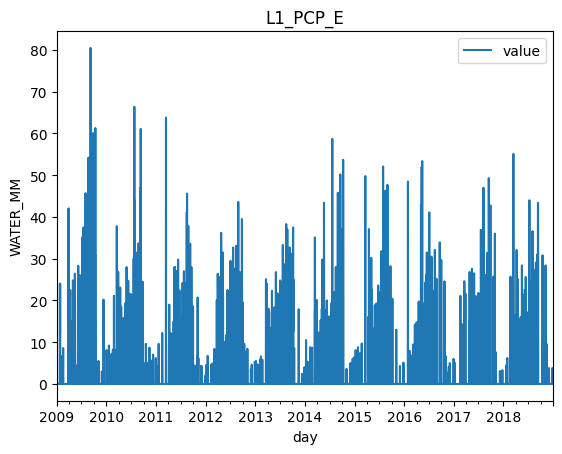

In [22]:
results=resp['response']
df=pd.DataFrame(results['items'],columns=results['header'])
df.index=pd.to_datetime(df.day,format='%Y-%m-%d') #conver 'day' column from string to datetime format
ax=df.plot() #plot time-series
ax.set_ylabel(measure) #y axis label
ax.set_title(cube_code) #title

To make the graph more meaningful, change the title to "Daily Precipitation" and y axis lable to "Precipitation (mm/day)".

**Optional:**

For some applications, you might have multiple points. You can use a loop in python to request their timeseries in one go.

First, define a list of points.

In [23]:
points=[
        [37.95883206252312, 7.89534],
       [37.45883206252312, 7.39534],
       [37.45883206252312, 8.39534]
        ] #list of point coordinates (X,Y)

Use a FOR loop to send requests for each point.

In [24]:
for i,point in enumerate(points):
    query_pixeltimeseries={
      "type": "PixelTimeSeries",
      "params": {
        "cube": {
          "code": cube_code,
          "workspaceCode": workspace,
          "language": "en"
        },
        "dimensions": [
          {
            "code": dimension,
            "range": "[2009-01-01,2019-01-01)"
          }
        ],
        "measures": [
          measure
        ],
        "point": {
          "crs": crs, #latlon projection
          "x":point[0],
            "y":point[1]
        }
      }
    }

    resp_query=requests.post(path_query,json=query_pixeltimeseries)
    resp_vp=resp_query.json()
    if resp_vp['message']=='OK':
        results=resp_vp['response']
        df=pd.DataFrame(results['items'],columns=['Date','Lat: {0}, Lon: {1}'.format(point[1],point[0])])
        if i==0:
            df_all=df
        else:
            df_all=pd.merge(df_all,df)
    else:
        print(resp_vp['message'])

df_all

,Date,"Lat: 7.89534, Lon: 37.95883206252312","Lat: 7.39534, Lon: 37.45883206252312","Lat: 8.39534, Lon: 37.45883206252312"
0,2009-01-01,0.0,0.0,0.0
1,2009-01-02,0.0,0.0,0.0
2,2009-01-03,0.0,0.0,0.0
3,2009-01-04,0.0,0.0,0.0
4,2009-01-05,0.0,0.0,0.0
...,...,...,...,...
3647,2018-12-27,3.8,0.0,2.6
3648,2018-12-28,0.0,0.0,0.0
3649,2018-12-29,0.0,0.0,0.0
3650,2018-12-30,0.0,0.0,0.0


Now, we can plot the timeseries of multiple points at once

<Axes: xlabel='Date'>

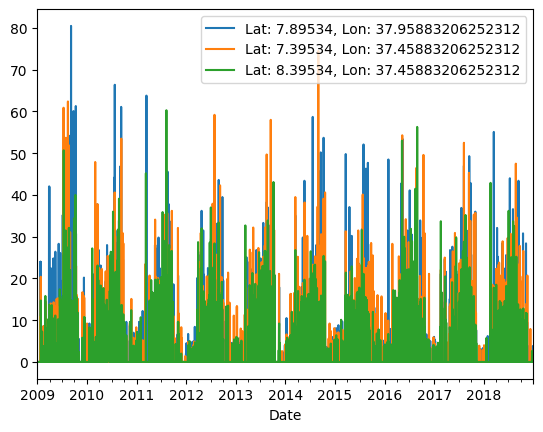

In [25]:
df_all.index=pd.to_datetime(df_all.Date,format='%Y-%m-%d') #conver 'day' column from string to datetime format
df_all.plot() #plot time-series of all points

# 6. Get areal statistics timeseries<a name="area"></a>

We can also request timeseries of an area of interest (polygon) using the *query* url. For this type of query, you will need to authorize your access using the API token acquired before.

In [ ]:
import requests
import pandas as pd

path_query=r'https://io.apps.fao.org/gismgr/api/v1/query/'
path_sign_in=r'https://io.apps.fao.org/gismgr/api/v1/iam/sign-in/'

APIToken=input('Your API token: ')

We will use our API token to authorize our access. After this step, we will have an access token, which is needed for our query payload.

In [27]:
resp_signin=requests.post(path_sign_in,headers={'X-GISMGR-API-KEY':APIToken})
resp_signin = resp_signin.json()
AccessToken=resp_signin['response']['accessToken']
AccessToken

'eyJhbGciOiJSUzI1NiIsImtpZCI6IjhkMDNhZTdmNDczZjJjNmIyNTI3NmMwNjM2MGViOTk4ODdlMjNhYTkiLCJ0eXAiOiJKV1QifQ.eyJuYW1lIjoiQmljaCBUcmFuIiwicGljdHVyZSI6Imh0dHBzOi8vbGg0Lmdvb2dsZXVzZXJjb250ZW50LmNvbS8tQkxvTDhOYUVLNm8vQUFBQUFBQUFBQUkvQUFBQUFBQUFCTDgvMlFJTzFRQUlxbW8vcGhvdG8uanBnIiwiaXNzIjoiaHR0cHM6Ly9zZWN1cmV0b2tlbi5nb29nbGUuY29tL3VuZmFvLWFwcHMtZGV2IiwiYXVkIjoidW5mYW8tYXBwcy1kZXYiLCJhdXRoX3RpbWUiOjE2ODc4MDg2MTEsInVzZXJfaWQiOiJSNk5Ibkd5dDRUT3p1M212T2tteE04UkxFMnUxIiwic3ViIjoiUjZOSG5HeXQ0VE96dTNtdk9rbXhNOFJMRTJ1MSIsImlhdCI6MTY4NzgwODYxMSwiZXhwIjoxNjg3ODEyMjExLCJlbWFpbCI6ImJpY2h0bjk0QGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJmaXJlYmFzZSI6eyJpZGVudGl0aWVzIjp7Imdvb2dsZS5jb20iOlsiMTAyMTY0MjA1NjAzMjU1NDMxMjQzIl0sImVtYWlsIjpbImJpY2h0bjk0QGdtYWlsLmNvbSJdfSwic2lnbl9pbl9wcm92aWRlciI6ImN1c3RvbSJ9fQ.xoq_vMJRVmsN3j7jLulh1j8I9SvN6qHU5UUENym_vwJBXwPdvCjAhFz31oMXxKcyfEcNZ-fFHcDCE8QpDlKUY9PAOcdYR6SG3PMAQEWezTNB0chQwx3r7QlIyMIlHnSZbjuCbHbPlql8sN9j0r4WcySnTPX7DvDftE6IoXlyH7yVcZtRBuozIhDVnmQ-b6SSJt6EVTQNELyV1n3-3

Similar to previous sections, we will write a query payload with these information:
- Workspace code
- Datacube code
- Time period
- Measure
- Dimention
- Polygon coordinates

In [28]:
crs="EPSG:4326" #coordinate reference system
cube_code="L1_PCP_E"
workspace='WAPOR_2'
start_date="2009-01-01"
end_date="2019-01-01"

#get datacube measure
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/measures'
resp=requests.get(cube_url).json()
measure=resp['response']['items'][0]['code']
print('MEASURE: ',measure)

#get datacube time dimension
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/dimensions'
resp=requests.get(cube_url).json()
items=pd.DataFrame.from_dict(resp['response']['items'])
dimension=items[items.type=='TIME']['code'].values[0]
print('DIMENSION: ',dimension)

MEASURE:  WATER_MM
DIMENSION:  DAY


Now, we will define our area of interest. You can do this either by defining the coordinates of a bounding box or reading a shapefile.

If you want to use a bounding box, use the code below:

In [29]:
bbox= [37.95883206252312, 7.89534, 43.32093, 12.3873979377346] #latlon
xmin,ymin,xmax,ymax=bbox[0],bbox[1],bbox[2],bbox[3]
Polygon=[
          [xmin,ymin],
          [xmin,ymax],
          [xmax,ymax],
          [xmax,ymin],
          [xmin,ymin]
        ]
query_areatimeseries={
  "type": "AreaStatsTimeSeries",
  "params": {
    "cube": {
      "code": cube_code, #cube_code
      "workspaceCode": workspace, #workspace code: use WAPOR for v1.0 and WAPOR_2 for v2.1
      "language": "en"
    },
    "dimensions": [
      {
        "code": dimension, #use DAY DEKAD MONTH or YEAR
        "range": f"[{start_date},{end_date})" #start date and endate
      }
    ],
    "measures": [
      measure
    ],
    "shape": {
      "type": "Polygon",
      "properties": {
      "name": crs #coordinate reference system
              },
      "coordinates": [
       Polygon
      ]
    }
  }
}

query_areatimeseries

{'type': 'AreaStatsTimeSeries',
 'params': {'cube': {'code': 'L1_PCP_E',
   'workspaceCode': 'WAPOR_2',
   'language': 'en'},
  'dimensions': [{'code': 'DAY', 'range': '[2009-01-01,2019-01-01)'}],
  'measures': ['WATER_MM'],
  'shape': {'type': 'Polygon',
   'properties': {'name': 'EPSG:4326'},
   'coordinates': [[[37.95883206252312, 7.89534],
     [37.95883206252312, 12.3873979377346],
     [43.32093, 12.3873979377346],
     [43.32093, 7.89534],
     [37.95883206252312, 7.89534]]]}}}

Now, we will use POST method to request the timeseries for our area of interest.

In [30]:
resp_query=requests.post(path_query,headers={'Authorization':'Bearer {0}'.format(AccessToken)},
                                          json=query_areatimeseries)
resp_query = resp_query.json()
resp_query

{'requestId': '69718885-1e11-43a8-ab6d-aa502c931d99',
 'timestamp': 1687808612078,
 'runtime': 17,
 'status': 200,
 'message': 'OK',
 'response': {'workspaceCode': 'WAPOR_2',
  'code': '69718885-1e11-43a8-ab6d-aa502c931d99',
  'type': 'AREA STATS',
  'priority': 20,
  'additionalInfo': {'cube': {'code': 'L1_PCP_E',
    'workspaceCode': 'WAPOR_2',
    'language': 'en'},
   'dimensions': [{'code': 'DAY', 'range': '[2009-01-01,2019-01-01)'}],
   'measures': ['WATER_MM'],
   'shape': {'type': 'Polygon',
    'properties': {'name': 'EPSG:4326'},
    'coordinates': [[[37.95883206252312, 7.89534],
      [37.95883206252312, 12.3873979377346],
      [43.32093, 12.3873979377346],
      [43.32093, 7.89534],
      [37.95883206252312, 7.89534]]]}},
  'userId': 'R6NHnGyt4TOzu3mvOkmxM8RLE2u1',
  'created': '2023-06-26 19:43:32',
  'status': 'WAITING',
  'links': [{'rel': 'self',
    'href': 'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/WAPOR_2/jobs/69718885-1e11-43a8-ab6d-aa502c931d99'}]}}

Unlike PointTimeSeries query, the AreaStatsTimeSeries query will not respond with timeseries data directly, but it will provide an url of the request (job).

In [31]:
job_url=resp_query['response']['links'][0]['href']

job_url

'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/WAPOR_2/jobs/69718885-1e11-43a8-ab6d-aa502c931d99'

We use this url in a GET request to get the results of the areal statistics computation.

In [32]:
resp = requests.get(job_url)
resp=resp.json()
resp

{'requestId': 'ada30dd3-c228-44bc-a6a4-2c13e23530e5',
 'timestamp': 1687808612163,
 'runtime': 3,
 'status': 200,
 'message': 'OK',
 'response': {'workspaceCode': 'WAPOR_2',
  'code': '69718885-1e11-43a8-ab6d-aa502c931d99',
  'type': 'AREA STATS',
  'priority': 20,
  'additionalInfo': {'cube': {'code': 'L1_PCP_E',
    'workspaceCode': 'WAPOR_2',
    'language': 'en'},
   'dimensions': [{'code': 'DAY', 'range': '[2009-01-01,2019-01-01)'}],
   'measures': ['WATER_MM'],
   'shape': {'type': 'Polygon',
    'properties': {'name': 'EPSG:4326'},
    'coordinates': [[[37.95883206252312, 7.89534],
      [37.95883206252312, 12.3873979377346],
      [43.32093, 12.3873979377346],
      [43.32093, 7.89534],
      [37.95883206252312, 7.89534]]]}},
  'userId': 'R6NHnGyt4TOzu3mvOkmxM8RLE2u1',
  'created': '2023-06-26 19:43:32',
  'status': 'WAITING',
  'links': [{'rel': 'self',
    'href': 'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/WAPOR_2/jobs/69718885-1e11-43a8-ab6d-aa502c931d99'}]}}

It will take some time for the calculation to be finished. When it is finished, the response status will be changed from 'RUNNING' to 'COMPLETED' or 'COMPLETED WITH ERRORS'. If it is COMPLETED, the area time series results can be achieved from Response 'output'.

We can use a WHILE loop to check when the *"job"* is done.

In [33]:
i=0
print('RUNNING',end=" ")
while i==0:
    resp = requests.get(job_url)
    resp=resp.json()

    if resp['response']['status']=='RUNNING':
        print('.',end =" ")
    if resp['response']['status']=='COMPLETED':
        results=resp['response']['output']
        df=pd.DataFrame(results['items'],columns=results['header'])
        i=1
    if resp['response']['status']=='COMPLETED WITH ERRORS':
        print(resp['response']['log'])
        i=1
df

RUNNING . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

,day,avg,min,max,range
0,2009-01-01,0.000157,0.0,0.3,0.3
1,2009-01-02,0.000251,0.0,0.5,0.5
2,2009-01-03,0.000292,0.0,0.6,0.6
3,2009-01-04,0.000000,0.0,0.0,0.0
4,2009-01-05,0.000616,0.0,0.3,0.3
...,...,...,...,...,...
3647,2018-12-27,0.145076,0.0,6.5,6.5
3648,2018-12-28,0.425117,0.0,7.2,7.2
3649,2018-12-29,0.112115,0.0,6.4,6.4
3650,2018-12-30,0.105399,0.0,6.4,6.4


The output includes average, minimum, maximum, and range of all the pixels within the defined area.

<Axes: xlabel='day'>

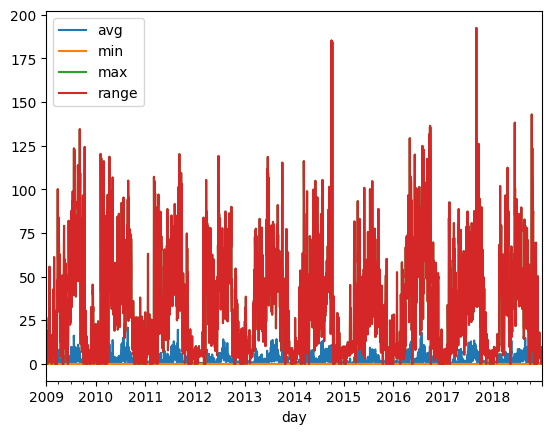

In [34]:
df.index=pd.to_datetime(df.day,format='%Y-%m-%d')
df.plot()

# 7. Get cropped raster<a name="raster"></a>

With the REST API, we can also request the server to crop a raster layer to our area of interest. Similar to the previous type of query, we will also need to authorize our access and have an access token.

If you have run [Section 6](#area), you should have an access token ready.

In [35]:
AccessToken

'eyJhbGciOiJSUzI1NiIsImtpZCI6IjhkMDNhZTdmNDczZjJjNmIyNTI3NmMwNjM2MGViOTk4ODdlMjNhYTkiLCJ0eXAiOiJKV1QifQ.eyJuYW1lIjoiQmljaCBUcmFuIiwicGljdHVyZSI6Imh0dHBzOi8vbGg0Lmdvb2dsZXVzZXJjb250ZW50LmNvbS8tQkxvTDhOYUVLNm8vQUFBQUFBQUFBQUkvQUFBQUFBQUFCTDgvMlFJTzFRQUlxbW8vcGhvdG8uanBnIiwiaXNzIjoiaHR0cHM6Ly9zZWN1cmV0b2tlbi5nb29nbGUuY29tL3VuZmFvLWFwcHMtZGV2IiwiYXVkIjoidW5mYW8tYXBwcy1kZXYiLCJhdXRoX3RpbWUiOjE2ODc4MDg2MTEsInVzZXJfaWQiOiJSNk5Ibkd5dDRUT3p1M212T2tteE04UkxFMnUxIiwic3ViIjoiUjZOSG5HeXQ0VE96dTNtdk9rbXhNOFJMRTJ1MSIsImlhdCI6MTY4NzgwODYxMSwiZXhwIjoxNjg3ODEyMjExLCJlbWFpbCI6ImJpY2h0bjk0QGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJmaXJlYmFzZSI6eyJpZGVudGl0aWVzIjp7Imdvb2dsZS5jb20iOlsiMTAyMTY0MjA1NjAzMjU1NDMxMjQzIl0sImVtYWlsIjpbImJpY2h0bjk0QGdtYWlsLmNvbSJdfSwic2lnbl9pbl9wcm92aWRlciI6ImN1c3RvbSJ9fQ.xoq_vMJRVmsN3j7jLulh1j8I9SvN6qHU5UUENym_vwJBXwPdvCjAhFz31oMXxKcyfEcNZ-fFHcDCE8QpDlKUY9PAOcdYR6SG3PMAQEWezTNB0chQwx3r7QlIyMIlHnSZbjuCbHbPlql8sN9j0r4WcySnTPX7DvDftE6IoXlyH7yVcZtRBuozIhDVnmQ-b6SSJt6EVTQNELyV1n3-3

We will write a query payload with these information:
- Workspace code
- Datacube code
- Measure
- Dimensions
- Polygon coordinates

In [36]:
cube_code='L2_AETI_M'
workspace='WAPOR_2'
outputFileName='L2_AETI_M_201701_clipped.tif'

#get datacube measure
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/measures'
resp=requests.get(cube_url).json()
measure=resp['response']['items'][0]['code']
print('MEASURE: ',measure)

#get datacube time dimension
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/dimensions'
resp=requests.get(cube_url).json()
items=pd.DataFrame.from_dict(resp['response']['items'])
items

MEASURE:  WATER_MM


,code,caption,workspaceCode,hierarchical,type,index,links
0,MONTH,Month,WAPOR_2,False,TIME,1,"[{'rel': 'self', 'href': 'https://io.apps.fao...."


For the Actual Evapotranspiration and Interception layer, there is MONTH dimension. We will define which month we want to request raster. For example, we will get the raster data of January 2017.

In [37]:
month="[2017-01-01,2017-02-01)"

For this example, we will the same area of interest as [Section 6](#area)

In [38]:
Polygon

[[37.95883206252312, 7.89534],
 [37.95883206252312, 12.3873979377346],
 [43.32093, 12.3873979377346],
 [43.32093, 7.89534],
 [37.95883206252312, 7.89534]]

Now, we will write these information in a payload.

In [39]:
query_payload={
  "type": "CropRaster",
  "params": {
    "properties": {
      "outputFileName": outputFileName,
      "cutline": True,
      "tiled": True,
      "compressed": True,
      "overviews": True
    },
    "cube": {
      "code": cube_code,
      "workspaceCode": workspace,
      "language": "en"
    },
    "dimensions": [
      {
        "code": "MONTH",
        "values": [
          month
        ]
      }
    ],
    "measures": [
      measure
    ],
    "shape": {
      "type": "Polygon",
      "coordinates": [Polygon]
    }
  }
}

query_payload

{'type': 'CropRaster',
 'params': {'properties': {'outputFileName': 'L2_AETI_M_201701_clipped.tif',
   'cutline': True,
   'tiled': True,
   'compressed': True,
   'overviews': True},
  'cube': {'code': 'L2_AETI_M', 'workspaceCode': 'WAPOR_2', 'language': 'en'},
  'dimensions': [{'code': 'MONTH', 'values': ['[2017-01-01,2017-02-01)']}],
  'measures': ['WATER_MM'],
  'shape': {'type': 'Polygon',
   'coordinates': [[[37.95883206252312, 7.89534],
     [37.95883206252312, 12.3873979377346],
     [43.32093, 12.3873979377346],
     [43.32093, 7.89534],
     [37.95883206252312, 7.89534]]]}}}

Similar to Section 6, we will use POST method and obtain an url for our request.

In [40]:
resp_query=requests.post(path_query,headers={'Authorization':'Bearer {0}'.format(AccessToken)},
                                          json=query_payload)
resp_query = resp_query.json()
job_url=resp_query['response']['links'][0]['href']

job_url

'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/WAPOR_2/jobs/87a1759c-783f-42bc-8e6e-ab335ba714db'

We have to wait the job to be completed.

In [41]:
i=0
print('RUNNING',end=" ")
while i==0:
    resp = requests.get(job_url)
    resp=resp.json()

    if resp['response']['status']=='RUNNING':
        print('.',end =" ")
    if resp['response']['status']=='COMPLETED':
        results=resp['response']['output']
        print(resp['response']['output'])
        i=1
    if resp['response']['status']=='COMPLETED WITH ERRORS':
        print(resp['response']['log'])
        i=1

RUNNING . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

After that, the response will contain an url to geoTIFF file in the output.

In [42]:
raster_url=resp['response']['output']['downloadUrl']
raster_url

'https://io.apps.fao.org/gismgr/download/6d1f74b9-b8c9-4deb-918c-2787a5e779a5/L2_AETI_M_201701_clipped.tif'

We can now use this url to download the cropped raster.

In [43]:
import os

if not os.path.exists('data'):
    os.makedirs('data')

response = requests.get(raster_url)
file_path = os.path.join('./data',outputFileName)

if response.status_code == 200:
    with open(file_path, 'wb') as file:
        file.write(response.content)

Then, we can visualize the raster using rasterio.

In [44]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 60.7 MB/s eta 0:00:00


{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 5405, 'height': 4528, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.000992063492, 0.0, 37.95882934644399,
       0.0, -0.000992063492, 12.387400809704005)}


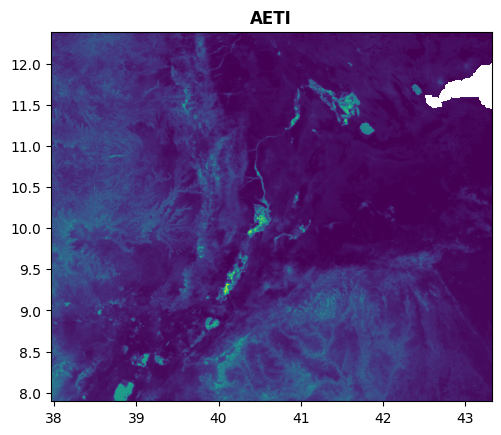

<Axes: title={'center': 'AETI'}>

In [45]:
import rasterio
from rasterio.plot import show

# open the raster layer
aeti = rasterio.open(file_path, driver='GTiff')

# print the metadata
print(aeti.meta)

# plot the map
show(aeti, title='AETI')

# 8. Get crop water productivity<a name="wp"></a>

WaPOR database provide Gross Biomass Water Productivity, which is the Total Biomass Production divided by Actual Evapotranspiration and Interception (AETI). In case of crop-specific water productivity, it is calculated as the crop yield (kg/ha) divided by AETI (m$^3$/ha) over the growing season. The crop yield is calculated by multiplying Total Biomass Production crop parameters:

$Yield = TBP * cropMultiplier = TBP * LUE * HI * AoT / (1 - Θ)$

Where
1. Light Use Efficiency (LUE) is a coefficient for the efficiency by which vegetation converts energy
into biomass. A fixed value of 2.7 is applied to cropland in WaPOR and, through this interface,
the value is multiplied by 1.8 for C4 crops, which have higher LUE.
2. The Harvest Index (HI) indicates how much of the biomass production contributes to the harvestable fraction of a crop (yield). It is expressed as the ratio of weight of dry grains over the above-ground dry matter.
3. Above ground over Total biomass (AoT) ratio is influenced by several factors, including root development.
4. The Moisture content ratio (θ) allows for converting fresh yield into dry yield by accounting for water content in harvested product.


We can request this computation directly using WaPOR API when the crop parameters and growing season are known.

In [46]:
waterProductivity="GBWP" #"GBWP" or "NBWP"
cropMultiplier=0.5
startSeason="2015-01" # "YYYY-DK" (Dekad)
endSeason= "2015-18" # "YYYY-DK" (Dekad)
resolution="100m" #"250m" or "100m" , maybe "30m" works for some area

We will write these parameters into a query payload. The query type is CustomWaterProductivity.

We will use the same Polygon in the previous example.

In [49]:
query_payload ={
  "type": "CustomWaterProductivity",
  "params": {
    "waterProductivity": waterProductivity, #"GBWP" or "NBWP"
    "resolution": resolution, #"250m" or "100m" , maybe "30m" works for some area
    "startSeason": startSeason, # "YYYY-DK" (Dekad)
    "endSeason": endSeason, # "YYYY-DK" (Dekad),
    "cropMultiplier":cropMultiplier,
    "shape": {
      "type": "Polygon", #define coordinates of the area in geojson format
      "coordinates": [Polygon]
    }
  }
}

For this query, we wil the same AccessToken as before. Similar to the previous section, we will also get job_url in the response of POST query.

In [52]:
resp_query=requests.post(path_query,headers={'Authorization':'Bearer {0}'.format(AccessToken)},
                                          json=query_payload)
resp_query = resp_query.json()
job_url=resp_query['response']['links'][0]['href']

job_url

'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/WAPOR_2/jobs/96639652-2a8a-4bdd-bfbb-838bb618d9ef'

After the computation is completed, the response will contain the url to download 3 rasters. The raster files for download are named as in the following example:

- L2_AETI_1931_2009.tif = Total actual evapotranspiration and interception generated between dekad 31 in 2019 and dekad 09 in 2020 (1st of December 2019 – 31 March 2020) in m³/ha;
- L2_TBP_1931_2009.tif = Yield generated in the same growing season, in kg/ha;
- L2_GBWP_1931_2009.tif = Crop Water Productivity, with a scaling factor of 1000.

In [ ]:
i=0
print('RUNNING',end=" ")
while i==0:
    resp = requests.get(job_url)
    resp=resp.json()

    if resp['response']['status']=='RUNNING':
        print('.',end =" ")
    if resp['response']['status']=='COMPLETED':
        results=resp['response']['output']
        print('Link to download GBWP',results['bwpDownloadUrl'])
        print('Link to download TBP',results['tbpDownloadUrl'])
        print('Link to download AETI',results['wtrDownloadUrl'])
        i=1
    if resp['response']['status']=='COMPLETED WITH ERRORS':
        print(resp['response']['log'])
        i=1

RUNNING . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 